# NACHO DOCHAO & MAX VILARASAU #

# Import, Read & Display #

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

df=pd.read_excel('Beauty.xlsx')
df

,wage,exper,looks,union,goodhlth,black,female,married,south,bigcity,smllcity,service,educ
0,5.73,30.0,4.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,14.0
1,4.28,28.0,3.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,12.0
2,7.96,35.0,4.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,10.0
3,11.57,38.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,16.0
4,11.42,27.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,1.61,25.0,3.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,12.0
1256,1.68,4.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,12.0
1257,3.29,35.0,3.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,12.0
1258,2.31,15.0,3.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,10.0


# Model Zero #

In [2]:
m_wage = df.loc[df['female'] == 0, 'wage']
m_exper = df.loc[df['female'] == 0, 'exper']
f_wage = df.loc[df['female'] == 1, 'wage']
f_exper = df.loc[df['female'] == 1, 'exper']

print(f'WAGE Male\n\n{m_wage.describe()}')
print('------------------------------')
print(f'WAGE Female\n\n{f_wage.describe()}')
print('------------------------------')
print(f'EXPER Male\n\n{m_exper.describe()}')
print('------------------------------')
print(f'EXPER Female\n\n{f_exper.describe()}')
print('------------------------------')

WAGE Male

count    824.000000
mean       7.368823
std        4.592508
min        1.050000
25%        4.577500
50%        6.410000
75%        8.700000
max       41.670000
Name: wage, dtype: float64
------------------------------
WAGE Female

count    436.000000
mean       4.299358
std        4.097392
min        1.020000
25%        2.470000
50%        3.750000
75%        5.160000
max       77.720000
Name: wage, dtype: float64
------------------------------
EXPER Male

count    824.000000
mean      20.356796
std       12.175863
min        0.000000
25%       10.000000
50%       18.000000
75%       30.000000
max       48.000000
Name: exper, dtype: float64
------------------------------
EXPER Female

count    436.000000
mean      14.142202
std       10.413429
min        0.000000
25%        6.000000
50%       11.500000
75%       20.000000
max       47.000000
Name: exper, dtype: float64
------------------------------


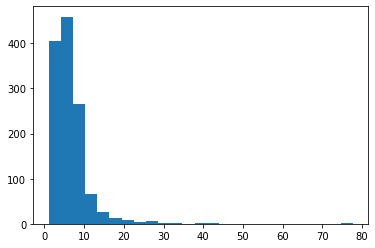

In [3]:
plt.hist(df['wage'], bins = 25)
plt.show()

In [4]:
abcd_vars = df[[
    'educ',
    'exper',
    'female',
    'wage',
    'service'
]]
abcd_vars.corr()

,educ,exper,female,wage,service
educ,1.000000,-0.186200,0.009105,0.212333,0.301628
exper,-0.186200,1.000000,-0.247209,0.234632,-0.057328
female,0.009105,-0.247209,1.000000,-0.313419,0.267961
wage,0.212333,0.234632,-0.313419,1.000000,-0.053653
service,0.301628,-0.057328,0.267961,-0.053653,1.000000


# Model One #

In [5]:
model_one = smf.ols('np.log(wage) ~ educ', data=df).fit()
output_model = model_one
print(output_model.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(wage)   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     95.89
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           7.18e-22
Time:                        18:37:50   Log-Likelihood:                -1085.9
No. Observations:                1260   AIC:                             2176.
Df Residuals:                    1258   BIC:                             2186.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9014      0.079     11.409      0.0

# Model Two #

In [6]:
model_two = smf.ols('np.log(wage) ~ educ + exper + looks', data=df).fit()
output_model = model_two
print(output_model.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(wage)   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     109.0
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           1.05e-62
Time:                        18:37:50   Log-Likelihood:                -986.41
No. Observations:                1260   AIC:                             1981.
Df Residuals:                    1256   BIC:                             2001.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2035      0.104      1.953      0.0

# Model Three #

In [7]:
model_three = smf.ols('np.log(wage) ~ educ + exper + np.power(exper, 2) + looks', data=df).fit()
output_model = model_three
print(output_model.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(wage)   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     94.91
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           1.38e-70
Time:                        18:37:50   Log-Likelihood:                -965.63
No. Observations:                1260   AIC:                             1941.
Df Residuals:                    1255   BIC:                             1967.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0463      0

# Model Four #

In [8]:
model_four = smf.ols('np.log(wage) ~ educ + exper + looks + female', data=df).fit()
output_model = model_four
print(output_model.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(wage)   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     158.8
Date:                Sun, 08 Dec 2024   Prob (F-statistic):          5.55e-110
Time:                        18:37:50   Log-Likelihood:                -874.18
No. Observations:                1260   AIC:                             1758.
Df Residuals:                    1255   BIC:                             1784.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5061      0.097      5.203      0.0

# Model Five #

In [9]:
df.columns

Index(['wage', 'exper', 'looks', 'union', 'goodhlth', 'black', 'female',
       'married', 'south', 'bigcity', 'smllcity', 'service', 'educ'],
      dtype='object')

In [10]:
model_five = smf.ols('np.log(wage) ~ exper + looks + union + goodhlth + black + female + married + south + bigcity + smllcity + service + educ', data=df).fit()
output_model = model_five
print(output_model.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(wage)   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     66.86
Date:                Sun, 08 Dec 2024   Prob (F-statistic):          2.31e-125
Time:                        18:37:50   Log-Likelihood:                -819.18
No. Observations:                1260   AIC:                             1664.
Df Residuals:                    1247   BIC:                             1731.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2422      0.110      2.194      0.0

In [11]:
total_residuals = model_five.resid
total_residuals

0       0.154259
1      -0.107949
2       0.638004
3       0.139570
4       0.278918
          ...   
1255   -0.588597
1256   -0.467550
1257   -0.100963
1258   -0.254982
1259   -0.864780
Length: 1260, dtype: float64

In [12]:
sum(total_residuals)

6.200595592531499e-13

# Model Six #

In [13]:
df['pretty'] = np.where(df['looks'].isin([4, 5]), 1, 0)
df['ugly'] = np.where(df['looks'].isin([1, 2]), 1, 0)

model_six = smf.ols('np.log(wage) ~ educ + exper + pretty + ugly', data=df).fit()
output_model = model_six
print(output_model.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(wage)   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     83.89
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           3.57e-63
Time:                        18:37:50   Log-Likelihood:                -982.86
No. Observations:                1260   AIC:                             1976.
Df Residuals:                    1255   BIC:                             2001.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4175      0.083      5.043      0.0

In [14]:
total_uglies = sum(df['ugly'])
print(f'theres a total of {total_uglies} uglies in the df')

theres a total of 155 uglies in the df


In [16]:
print("Al añadir 'mid' al modelo seis podemos encontrar problemas de multicolinealidad\n")

df['mid'] = np.where(df['looks'].isin([3]), 1, 0)

model_six_2 = smf.ols('np.log(wage) ~ educ + exper + pretty + ugly + mid', data=df).fit()
print(model_six_2.summary())

Al añadir 'mid' al modelo seis podemos encontrar problemas de multicolinealidad

                            OLS Regression Results                            
Dep. Variable:           np.log(wage)   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     83.89
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           3.57e-63
Time:                        18:40:32   Log-Likelihood:                -982.86
No. Observations:                1260   AIC:                             1976.
Df Residuals:                    1255   BIC:                             2001.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------